# Digit Classification

### This repository contains a machine learning project focused on classifying handwritten digits (0–9) using a variety of supervised learning algorithms.

# Load modules


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,balanced_accuracy_score,classification_report, confusion_matrix,make_scorer, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Load data

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
print(digits.data.shape)

(1797, 64)


In [8]:
# Assign x, y
x = digits.data  # x is a numpy arraay of shape (1797, 64)
y = digits.target  # shape (1797,)

In [9]:
n_classes = len(np.unique(y))
print(f"Number of classes: {n_classes}")

Number of classes: 10


In [10]:
print("Class labels:", digits.target_names)

Class labels: [0 1 2 3 4 5 6 7 8 9]


This Digits dataset contain 1797 images, with 64 pixel features (flatttened 8*8 image). They belong to 10 classes representing digits 0-9.

# **Data Exploration & Pre Processing**

In [ ]:
# Check for missing data

In [111]:
print("Total missing values:", np.isnan(x).sum())

Total missing values: 0


**Visualize a digit in gray scale**

<Figure size 640x480 with 0 Axes>

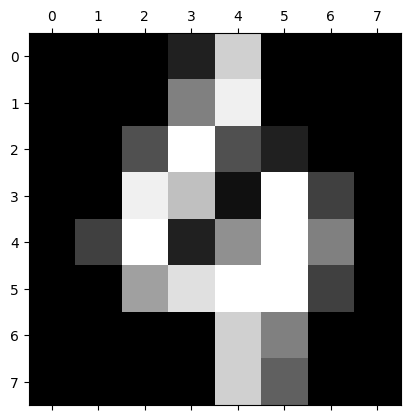

Label for this digit: 4


In [112]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()

# print the label of dogit
print("Label for this digit:", digits.target[100])

In [113]:
# create a df from the digits dataset
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['label'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### **Class Distribution**

<ipython-input-114-40491f509619>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="dark")


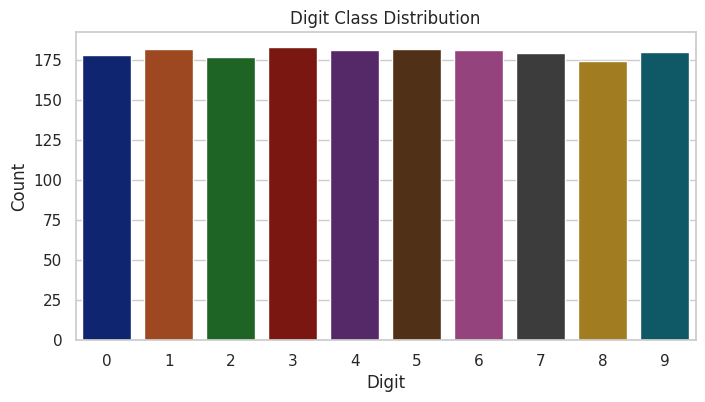

In [114]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x=y, palette="dark")
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

 **Correlation Heatmap - pairwise correlations between
 features**

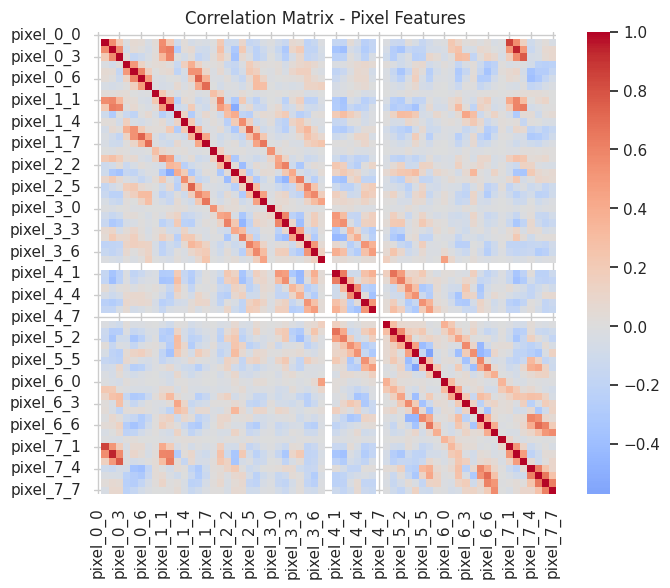

In [115]:
# Compute Pearson correlation matrix
corr_matrix = df.drop('label', axis=1).corr() # drop label column

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)
plt.title("Correlation Matrix - Pixel Features")
plt.show()

Find highly correlated features using Pearson correlation matrix correlation above a threshold (0.9)

In [116]:
# Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set threshold
threshold = 0.9

# Find column names where correlation > threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Number of features to drop: {len(to_drop)}")
print("Features:", to_drop)

Number of features to drop: 1
Features: ['pixel_7_2']


There is a one  feature that can be dropped due to high colinearity. However, it was not dropped at this point.

# **Classification**

## **Classification methods used**

1. Logistic Regression
2. KNN
3. Decision Trees
4. Random Forest
5. SVM
6. XGBoost
7. Gradient Boosting
8. Neural nets - MLP

In [13]:
# train-test split (80:20)
# Perform cross-validation only on the training set to tune hyperparameters.
# Evaluate performance of each model on the test set.

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
# scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
# Convert multi-class labels into one-hot encoding format
# This will be used for computing macro-averaged ROC AUC since roc_auc_score expects binary clssification for each class.

class_labels = np.unique(y) #  [0, 1, ..., 9] for digits dataset
y_test_bin = label_binarize(y_test, classes=class_labels)

In [16]:
# Initialize an empty dictionary to store evaluation data for each model
# For each model,
#'y_true': the true labels from the test set and
#'y_score': the predicted class probabilities from model.predict_proba will be stored.
# This allows to compute and plot ROC curves for multiple models.

roc_data = {}


# **1. Logistic Regression**

## **1.1 Default Training**

In [17]:
clf_def_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_def_lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## **1.1 Evaluation**

In [18]:
# Predict class labels and probabilities
y_pred_lr_def = clf_def_lr.predict(x_test_scaled) # model-predicted labels
y_proba_lr_def = clf_def_lr.predict_proba(x_test_scaled)  # model-predicted probabilities for each digit class


# Compute metrics
acc = accuracy_score(y_test, y_pred_lr_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_lr_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_lr_def, average='macro', multi_class='ovr')

# Print results
print("Default Logistic Regression Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")


Default Logistic Regression Performance:
Accuracy: 0.9722
Balanced Accuracy: 0.9719
ROC AUC (macro): 0.9991


In [90]:
#print (y_pred_def)
#print (y_proba_def)


Classification Logistic Regression Report (Default):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



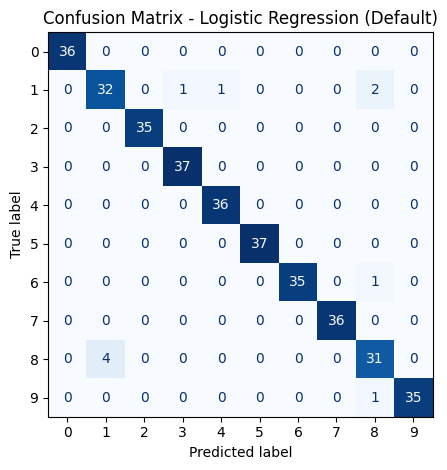

In [20]:
# Classification report for default Logistic Regression:
print("\nClassification Logistic Regression Report (Default):")
print(classification_report(y_test, y_pred_lr_def))

# Confusion matrix for default Logistic Regression
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr_def, display_labels=class_labels,
    cmap='Blues', colorbar=False
)
plt.title("Confusion Matrix - Logistic Regression (Default)")
plt.tight_layout()
plt.show()

# **1.2 Training with Hyperparameter Tuning**

In [21]:
# Define Parameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}

In [22]:
scoring = {
    'accuracy': 'accuracy',
    'balanced_accuracy': 'balanced_accuracy',
    'roc_auc_macro': make_scorer(
        roc_auc_score,
        average='macro',
        multi_class='ovr',
        needs_proba=True
    )
}


In [23]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             refit='roc_auc_macro',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'roc_auc_macro': make_scorer(roc_auc_score, response_method='predict', average=macro, multi_class=ovr, needs_proba=True)},
             verbose=1)

In [24]:
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)

best_lr_model = grid_search.best_estimator_


Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}


# **1.2 Evaluation**

In [25]:
# Predict on test set
y_pred_lr_tuned = best_lr_model.predict(x_test_scaled)
y_proba_lr_tuned = best_lr_model.predict_proba(x_test_scaled)


# Print performance metrics
print("Hyperparameter optimized Logistic Regression (Test Set Performance):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_tuned):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_lr_tuned):.4f}")
print(f"ROC AUC (macro): {roc_auc_score(y_test_bin, y_proba_lr_tuned, average='macro', multi_class='ovr'):.4f}")


Hyperparameter optimized Logistic Regression (Test Set Performance):
Accuracy: 0.9472
Balanced Accuracy: 0.9468
ROC AUC (macro): 0.9961


In [26]:

# Classification report
print("\nClassification Logistic Regression Report (Tuned):")
print(classification_report(y_test, y_pred_lr_tuned))





Classification Logistic Regression Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.82      0.86      0.84        36
           2       0.97      1.00      0.99        35
           3       1.00      0.97      0.99        37
           4       0.95      1.00      0.97        36
           5       1.00      0.97      0.99        37
           6       1.00      0.94      0.97        36
           7       0.95      1.00      0.97        36
           8       0.90      0.80      0.85        35
           9       0.89      0.94      0.92        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



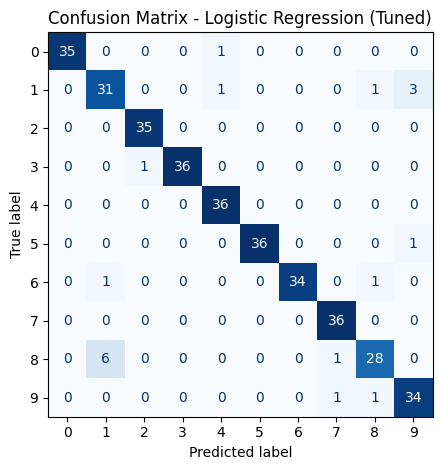

In [27]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_tuned, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.tight_layout()
plt.show()

Logistic Regression with default parameters performed better than the model with tuned hyperparameters. This could be due to overfitting in CV or due to chosen parameters in the parameter grid.


In [28]:
# add best model into roc_data for roc plotting
roc_data['Logistic Regression'] = {
    'y_true': y_test,
    'y_proba': y_proba_lr_def  # from model.predict_proba
}

In [233]:
# print(roc_data)

# **2. KNN**

## **2.1 KNN Default Training**

In [29]:
# Default KNN model
clf_def_knn = KNeighborsClassifier()
clf_def_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

## **2.2 KNN Default Training Evaluation**

In [30]:
# Predict labels and probabilities
y_pred_knn_def = clf_def_knn.predict(x_test_scaled)
y_proba_knn_def = clf_def_knn.predict_proba(x_test_scaled)



# Compute metrics
acc = accuracy_score(y_test, y_pred_knn_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_knn_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_knn_def, average='macro', multi_class='ovr')

In [31]:
# Print metrics
print("Default KNN Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")


Default KNN Performance:
Accuracy: 0.9639
Balanced Accuracy: 0.9637
ROC AUC (macro): 0.9950


In [32]:
print("\nClassification Report KNN (Default):")
print(classification_report(y_test, y_pred_knn_def))


Classification Report KNN (Default):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       0.97      0.97      0.97        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       0.97      0.89      0.93        35
           9       0.97      0.89      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



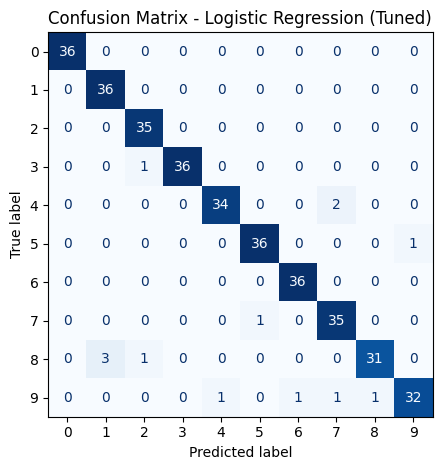

In [33]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_def, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.tight_layout()
plt.show()

## **2.3 KNN Training with Hyperparameter Tuning**

In [34]:
# define parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19, 21],
    'weights': ['uniform', 'distance']
}


In [35]:
#GridSearch

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

#training
grid_knn.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19,
                                         21],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [36]:
#get best parameters
print("Best hyperparameters:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

Best hyperparameters: {'n_neighbors': 17, 'weights': 'distance'}


## **2.4 KNN Tuned Parameter Evaluation**

In [37]:
# Predict on test set
y_pred_knn_tuned = best_knn.predict(x_test_scaled)
y_proba_knn_tuned = best_knn.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_knn_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_knn_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_knn_tuned, average='macro', multi_class='ovr')

# Print
print("KNN Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report KNN (Tuned):")
print(classification_report(y_test, y_pred_knn_tuned))


KNN Performance (Tuned):
Accuracy: 0.9556
Balanced Accuracy: 0.9552
ROC AUC (macro): 0.9973

Classification Report KNN (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.83      0.94      0.88        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       1.00      0.97      0.99        36
           5       0.95      0.97      0.96        37
           6       0.95      0.97      0.96        36
           7       0.95      0.97      0.96        36
           8       1.00      0.80      0.89        35
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [38]:
train_acc = accuracy_score(y_train, best_knn.predict(x_train_scaled))

print(f"Train Acc: {train_acc:.4f}")

Train Acc: 1.0000


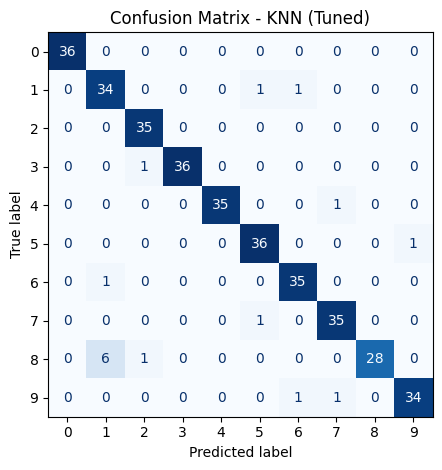

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - KNN (Tuned)")
plt.tight_layout()
plt.show()

In [40]:
#add best model into roc_data for roc plotting
roc_data['KNN (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_knn_tuned
}

# **3. Decision Tree**

## **3.1 Decision Tree Default Training**

In [41]:
# Initialize and train default decision tree
clf_def_dt = DecisionTreeClassifier(random_state=42)
clf_def_dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

## **3.2 Decision Tree Default Training Evaluation**

In [42]:
# Predict labels and probabilities
y_pred_dt_def = clf_def_dt.predict(x_test_scaled)
y_proba_dt_def = clf_def_dt.predict_proba(x_test_scaled)



# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred_dt_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_dt_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_dt_def, average='macro', multi_class='ovr')

print(" Decision Tree  Performance (Default):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_def))

 Decision Tree  Performance (Default):
Accuracy: 0.8167
Balanced Accuracy: 0.8159
ROC AUC (macro): 0.8978

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.77      0.77      0.77        35
           3       0.78      0.78      0.78        37
           4       0.86      0.83      0.85        36
           5       0.88      0.95      0.91        37
           6       0.79      0.83      0.81        36
           7       0.82      0.86      0.84        36
           8       0.69      0.69      0.69        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.81       360
weighted avg       0.82      0.82      0.82       360



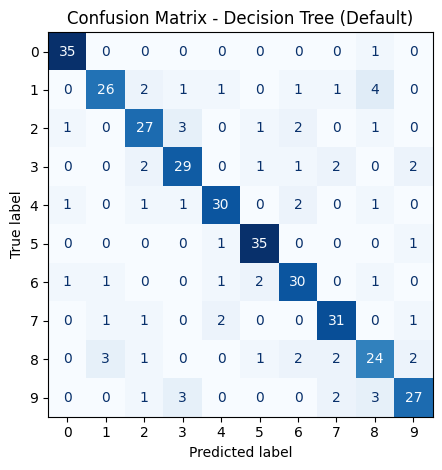

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_def,cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Decision Tree (Default)")
plt.tight_layout()
plt.show()

## **3.3 Decision Tree Training with Hyperparameter Tuning**

In [44]:
# parameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],         # Controls tree depth (None = full depth)
    'min_samples_split': [2, 5, 10],            # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']            # Splitting criteria
}


In [45]:
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='roc_auc_ovr',  # or use make_scorer(...) if you prefer macro AUC
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_dt.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [46]:
print("Best hyperparameters:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


## **3.4 Decision Tree Tuned Parameter Evaluation**

In [47]:
# Predict labels and probabilities on test set
y_pred_dt_tuned = best_dt.predict(x_test_scaled)
y_proba_dt_tuned = best_dt.predict_proba(x_test_scaled)

In [48]:
# Metrics
acc = accuracy_score(y_test, y_pred_dt_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_dt_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_dt_tuned, average='macro', multi_class='ovr')

print("Decision Tree Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuned))

Decision Tree Performance (Tuned):
Accuracy: 0.7472
Balanced Accuracy: 0.7456
ROC AUC (macro): 0.9314

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.52      0.44      0.48        36
           2       0.72      0.74      0.73        35
           3       0.88      0.81      0.85        37
           4       0.75      0.83      0.79        36
           5       0.70      0.95      0.80        37
           6       0.97      0.86      0.91        36
           7       0.65      0.83      0.73        36
           8       0.58      0.43      0.49        35
           9       0.74      0.69      0.71        36

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.74       360
weighted avg       0.75      0.75      0.74       360



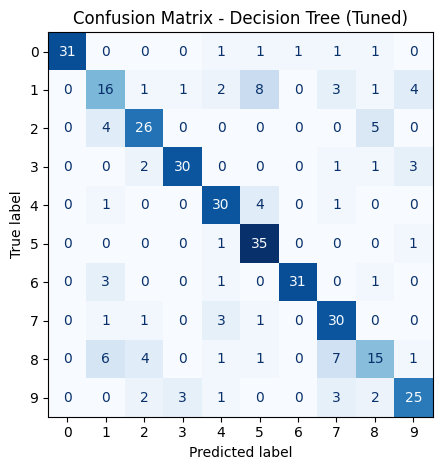

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Decision Tree (Tuned)")
plt.tight_layout()
plt.show()


In [50]:
# #add best model into roc_data for roc plotting
roc_data['Decision Tree (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_dt_tuned
}

# **4. Random Forest**

## **4.1 Random Forest Default Training**

In [51]:
# Default Random Forest
clf_def_rf = RandomForestClassifier(random_state=42)
clf_def_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## **4.2 Random Forest Default Training Evaluation**

In [52]:
# Predict labels and probabilities
y_pred_rf_def = clf_def_rf.predict(x_test_scaled)
y_proba_rf_def = clf_def_rf.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_rf_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_rf_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_rf_def, average='macro', multi_class='ovr')

print("Random Forest Performance (Default:")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_def))


Random Forest Performance (Default:
Accuracy: 0.9639
Balanced Accuracy: 0.9635
ROC AUC (macro): 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      0.97      0.95        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



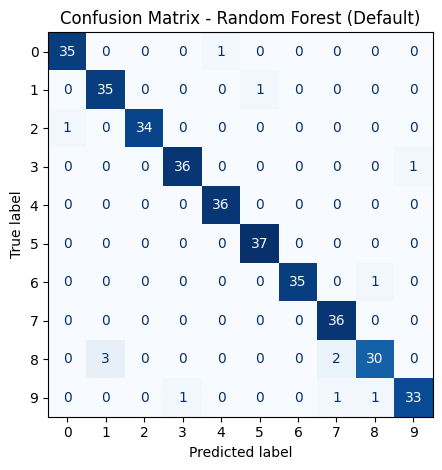

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_def, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Random Forest (Default)")
plt.tight_layout()
plt.show()

## **4.3 Random Forest Training with Hyperparameter Tuning**

In [54]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],              # Number of trees in the forest
    'max_depth': [None,10, 20, 30],             # Max depth of each tree
    'min_samples_split': [2, 5, 10],             # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Min samples required at a leaf node
    'criterion': ['gini', 'entropy']
}


In [55]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_rf.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [56]:
print("Best hyperparameters:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_



Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **4.4 Random Forest Tuned Parameter Evaluation**

In [57]:
# Predict
y_pred_rf_tuned = best_rf.predict(x_test_scaled)
y_proba_rf_tuned = best_rf.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_rf_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_rf_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_rf_tuned, average='macro', multi_class='ovr')

print("Random Forest Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))


Random Forest Performance (Tuned):
Accuracy: 0.9639
Balanced Accuracy: 0.9636
ROC AUC (macro): 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      0.97      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



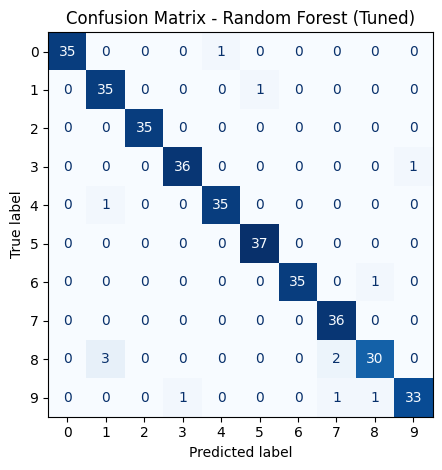

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.tight_layout()
plt.show()


In [59]:
# #add best model into roc_data for roc plotting
roc_data['Random Forest (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_rf_tuned
}


# **5. Support Vector Machine (SVM)**

## **5.1 SVM Default Training**

In [60]:
# Default SVM
clf_def_svm = SVC(probability=True, random_state=42)
clf_def_svm.fit(x_train_scaled, y_train)

SVC(probability=True, random_state=42)

## **5.2 SVM Default Training Evaluation**

In [61]:
# Predict labels and probabilities
y_pred_svm_def = clf_def_svm.predict(x_test_scaled)
y_proba_svm_def = clf_def_svm.predict_proba(x_test_scaled)



# Metrics
acc = accuracy_score(y_test, y_pred_svm_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_svm_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_svm_def, average='macro', multi_class='ovr')

print("SVM Performance (Default):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_def))


SVM Performance (Default):
Accuracy: 0.9750
Balanced Accuracy: 0.9748
ROC AUC (macro): 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



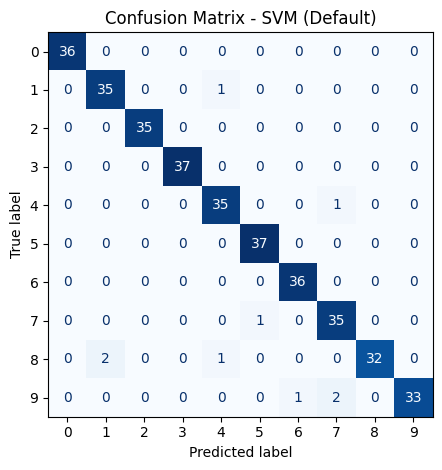

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_def, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - SVM (Default)")
plt.tight_layout()
plt.show()


## **5.3 SVM Training with Hyperparameter Tuning**

In [63]:
# parameter grid
param_grid_svm = {
    'C': [0.1, 1, 5, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [64]:
# run Gridsearch CV

grid_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svm,
    scoring='roc_auc_ovr',  # good for multi-class model selection
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_svm.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [65]:
print("Best hyperparameters:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_


Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


## **5.4 SVM Tuned Parameter Evaluation**

In [66]:
# Predict on test set
y_pred_svm_tuned = best_svm.predict(x_test_scaled)
y_proba_svm_tuned = best_svm.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_svm_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_svm_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_svm_tuned, average='macro', multi_class='ovr')

print("SVM  Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_tuned))


SVM  Performance (Tuned):
Accuracy: 0.9833
Balanced Accuracy: 0.9831
ROC AUC (macro): 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      0.94      0.94        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.91      0.94        35
           9       1.00      0.97      0.99        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



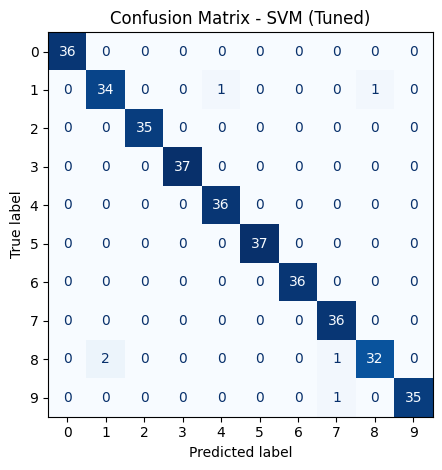

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - SVM (Tuned)")
plt.tight_layout()
plt.show()


In [68]:
# add best model into roc_data for roc plotting
roc_data['SVM (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_svm_tuned
}


# **6. XGBoost**

## **6.1 XGBoost Default Training**

In [69]:
clf_def_xgb = XGBClassifier(random_state=42)
clf_def_xgb.fit(x_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## **6.2 XGBoost Default Training Evaluation**

In [70]:
# Predict labels and probabilities on test set
y_pred_xgb_def = clf_def_xgb.predict(x_test_scaled)
y_proba_xgb_def = clf_def_xgb.predict_proba(x_test_scaled)



# Metrics
acc = accuracy_score(y_test, y_pred_xgb_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_xgb_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_xgb_def, average='macro', multi_class='ovr')

print("XGBoost  Performance (Default):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_def))


XGBoost  Performance (Default):
Accuracy: 0.9611
Balanced Accuracy: 0.9607
ROC AUC (macro): 0.9979

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.91      0.86      0.89        36
           2       1.00      0.97      0.99        35
           3       0.93      1.00      0.96        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.91      0.89      0.90        35
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



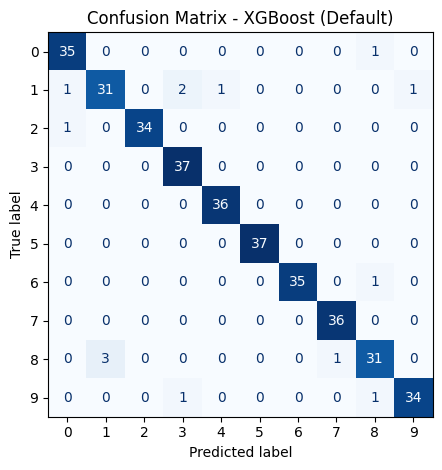

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_def, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - XGBoost (Default)")
plt.tight_layout()
plt.show()


## **6.3 XGBoost Training with Hyperparameter Tuning**

In [72]:
# parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [73]:
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ),
    param_grid=param_grid_xgb,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_xgb.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.8, 1]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [74]:
print("Best hyperparameters:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


## **6.4 XGBoost Tuned Parameter Evaluation**

In [75]:
# Predict on test set
y_pred_xgb_tuned = best_xgb.predict(x_test_scaled)
y_proba_xgb_tuned = best_xgb.predict_proba(x_test_scaled)



# Metrics
acc = accuracy_score(y_test, y_pred_xgb_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_xgb_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_xgb_tuned, average='macro', multi_class='ovr')

print("XGBoost Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))


XGBoost Performance (Tuned):
Accuracy: 0.9639
Balanced Accuracy: 0.9635
ROC AUC (macro): 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.91      0.89      0.90        36
           2       1.00      0.97      0.99        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.95      1.00      0.97        36
           8       0.91      0.89      0.90        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



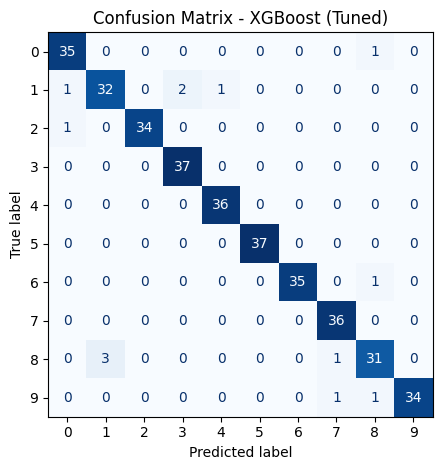

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.tight_layout()
plt.show()


In [77]:
#add best model into roc_data for roc plotting
roc_data['XGBoost (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_xgb_tuned
}


# **7. Gradient Booosting**

### **7.1 Gradient Boosting Default Training**

In [78]:
clf_def_gbc = GradientBoostingClassifier(random_state=42)
clf_def_gbc.fit(x_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

## **7.2 Gradient Boosting Default Training Evaluation**

In [79]:
# Predict labels and probabilities
y_pred_gbc_def = clf_def_gbc.predict(x_test_scaled)
y_proba_gbc_def = clf_def_gbc.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_gbc_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_gbc_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_gbc_def, average='macro', multi_class='ovr')

print(" Gradient Boosting Performance (Default):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc_def))


 Gradient Boosting Performance (Default):
Accuracy: 0.9528
Balanced Accuracy: 0.9525
ROC AUC (macro): 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.94      0.83      0.88        36
           2       0.97      0.97      0.97        35
           3       0.97      1.00      0.99        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        37
           6       0.97      0.94      0.96        36
           7       0.92      1.00      0.96        36
           8       0.89      0.91      0.90        35
           9       0.94      0.92      0.93        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



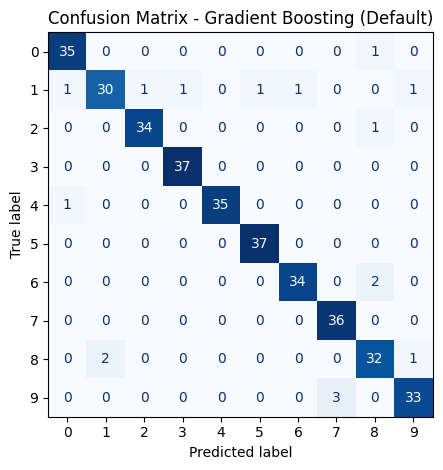

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbc_def, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Gradient Boosting (Default)")
plt.tight_layout()
plt.show()


## **7.3 Gradient Boosting Training with Hyperparameter Tuning**

In [81]:
# parameter grid
param_grid_gbc = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}


In [82]:
grid_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_gbc,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_gbc.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [83]:
print("Best hyperparameters:", grid_gbc.best_params_)
best_gbc = grid_gbc.best_estimator_

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.1}


## **7.4 Gradient Boosting Tuned Parameter Evaluation**

In [84]:
# Predictions on test set
y_pred_gbc_tuned = best_gbc.predict(x_test_scaled)
y_proba_gbc_tuned = best_gbc.predict_proba(x_test_scaled)



# Metrics
acc = accuracy_score(y_test, y_pred_gbc_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_gbc_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_gbc_tuned, average='macro', multi_class='ovr')

print("Gradient Boosting Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc_tuned))


Gradient Boosting Performance (Tuned):
Accuracy: 0.9556
Balanced Accuracy: 0.9552
ROC AUC (macro): 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.91      0.83      0.87        36
           2       0.97      0.97      0.97        35
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       0.97      0.94      0.96        36
           7       0.92      1.00      0.96        36
           8       0.89      0.91      0.90        35
           9       0.94      0.92      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



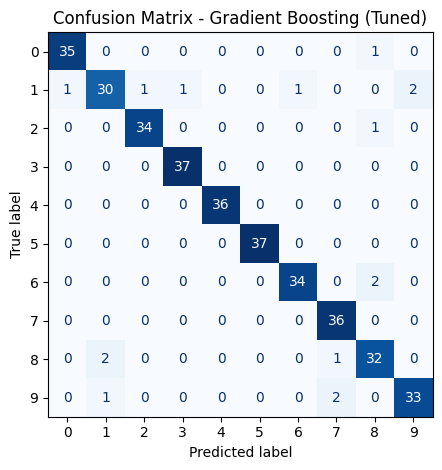

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbc_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Gradient Boosting (Tuned)")
plt.tight_layout()
plt.show()


In [86]:
#add best model into roc_data for roc plotting

roc_data['Gradient Boosting (tuned)'] = {
    'y_true': y_test,
    'y_proba': y_proba_gbc_tuned
}


# **8. Neural Nets - MLP (Multilayer perceptron)**

## **8.1 MLP Tree Default Training**

In [87]:
clf_def_mlp = MLPClassifier(random_state=42, max_iter=500)
clf_def_mlp.fit(x_train_scaled, y_train)


MLPClassifier(max_iter=500, random_state=42)

## **8.2 MLP Default Training Evaluation**

In [88]:
# Predict labels and probabilities on test set
y_pred_mlp_def = clf_def_mlp.predict(x_test_scaled)
y_proba_mlp_def = clf_def_mlp.predict_proba(x_test_scaled)


# Evaluation metrics
acc = accuracy_score(y_test, y_pred_mlp_def)
bal_acc = balanced_accuracy_score(y_test, y_pred_mlp_def)
roc_auc = roc_auc_score(y_test_bin, y_proba_mlp_def, average='macro', multi_class='ovr')

print("MLP Performance (Default):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_def))


MLP Performance (Default):
Accuracy: 0.9750
Balanced Accuracy: 0.9747
ROC AUC (macro): 0.9969

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.92      0.92        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.94      0.89      0.91        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



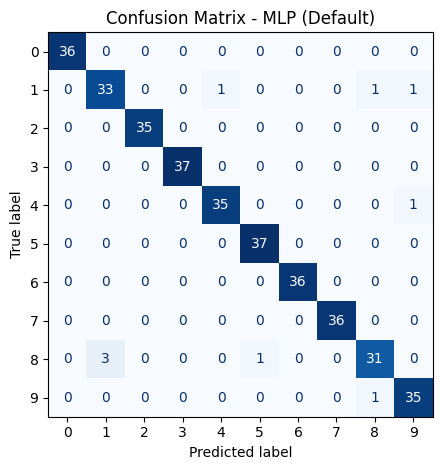

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp_def, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - MLP (Default)")
plt.tight_layout()
plt.show()


## **8.3 MLP Training with Hyperparameter Tuning**

In [90]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam']
}


In [91]:
grid_mlp = GridSearchCV(
    estimator=MLPClassifier(max_iter=500, random_state=42),
    param_grid=param_grid_mlp,
    scoring='roc_auc_ovr',
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_mlp.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (100, 100)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam']},
             return_train_score=True, scoring='roc_auc_ovr', verbose=1)

In [92]:
print("Best hyperparameters:", grid_mlp.best_params_)
best_mlp = grid_mlp.best_estimator_

Best hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}


## **8.4 MLP Tuned Parameter Evaluation**

In [93]:
y_pred_mlp_tuned = best_mlp.predict(x_test_scaled)
y_proba_mlp_tuned = best_mlp.predict_proba(x_test_scaled)


# Metrics
acc = accuracy_score(y_test, y_pred_mlp_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_mlp_tuned)
roc_auc = roc_auc_score(y_test_bin, y_proba_mlp_tuned, average='macro', multi_class='ovr')

print("MLP Performance (Tuned):")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_tuned))


MLP Performance (Tuned):
Accuracy: 0.9778
Balanced Accuracy: 0.9774
ROC AUC (macro): 0.9954

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       0.97      0.97      0.97        36
           7       0.97      1.00      0.99        36
           8       0.97      0.86      0.91        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



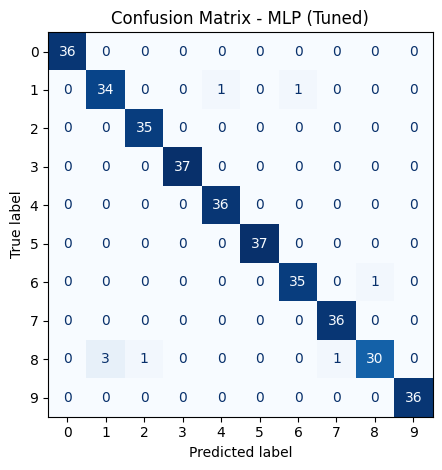

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp_tuned, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - MLP (Tuned)")
plt.tight_layout()
plt.show()


When compare ROC AUC (macro), default model of MLP exhibits a slighlty better performance than the parameter tuned model.

In [102]:
roc_data['MLP'] = {
    'y_true': y_test,
    'y_proba': y_proba_mlp_def
}


In [108]:
# function to extract data for plotting ROC curves
def extract_macro_roc_data(roc_data, class_labels):
    roc_curves = {}

    for model_name, data in roc_data.items():
        y_true = label_binarize(data['y_true'], classes=class_labels)
        y_proba = data['y_proba']
        fpr_list = []
        tpr_list = []

        for i in range(len(class_labels)):
            fpr, tpr, _ = roc_curve(y_true[:, i], y_proba[:, i])
            fpr_list.append(fpr)
            tpr_list.append(tpr)

        all_fpr = np.unique(np.concatenate(fpr_list))
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(len(class_labels)):
            mean_tpr += np.interp(all_fpr, fpr_list[i], tpr_list[i])

        mean_tpr /= len(class_labels)
        #macro_auc = auc(all_fpr, mean_tpr)
        macro_auc = roc_auc_score(y_true, y_proba, average='macro', multi_class='ovr')

        roc_curves[model_name] = {
            'fpr': all_fpr,
            'tpr': mean_tpr,
            'auc': macro_auc
        }

    return roc_curves


In [109]:
# function to Plot ROC curves
def plot_macro_roc_curves(roc_curves):
    plt.figure(figsize=(8, 6))

    for model_name, curve in roc_curves.items():
        plt.plot(curve['fpr'], curve['tpr'],
                 label=f"{model_name} (AUC = {curve['auc']:.4f})",
                 lw=2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Macro-Averaged ROC Curves")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

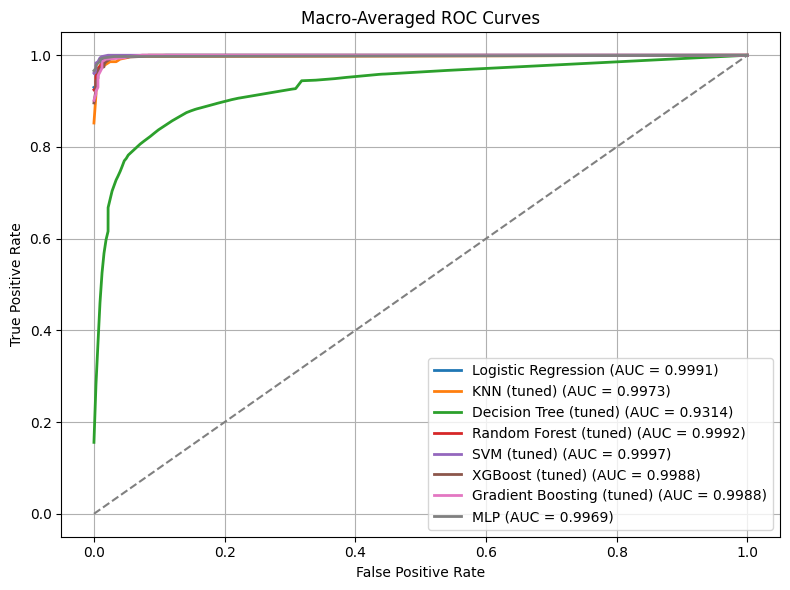

In [110]:
# Plot ROC curves for mutiple classification methods
roc_curves = extract_macro_roc_data(roc_data, class_labels=np.unique(y))
plot_macro_roc_curves(roc_curves)

## **References:**



1.   Saeys, Y., Inza, I. and Larrañaga, P., 2007. A review of feature selection techniques in bioinformatics. BMC Bioinformatics, 8(1), p.91.
2.   Cox, D.R., 1958. The regression analysis of binary sequences. Journal of the Royal Statistical Society: Series B (Methodological), 20(2), pp.215–242.
3. Cover, T. and Hart, P., 1967. Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), pp.21–27.
4. Breiman, L., Friedman, J.H., Olshen, R.A. and Stone, C.J., 1984. Classification and regression trees. Monterey, CA: Wadsworth and Brooks.
5. Breiman, L., 2001. Random forests. Machine Learning, 45, pp.5–32.
6. Cortes, C. and Vapnik, V., 1995. Support-vector networks. Machine Learning, 20, pp.273–297.
7. Chen, T. and Guestrin, C., 2016. XGBoost: A scalable tree boosting system. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, pp.785–794.
8. Friedman, J.H., 2001. Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29(5), pp.1189–1232.
9. Rumelhart, D.E., Hinton, G.E. and Williams, R.J., 1986. Learning representations by back-propagating errors. Nature, 323(6088), pp.533–536.

